# Fifa 16 Pro Clubs Probabilities

This is the story... So, in my pro club, we need to get 5 more wins out of 8 remaining games in order to promote to division 1 from our current division, 2! what are the chances!? well... i always like figuring things out! Lets find out!

In [1]:
from math import factorial
from scipy import linspace
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

## Win Probability Analysis

In [2]:
win = 514
draw = 260
loss = 527
total = win + draw +loss
p_win_raw = win / total
p_win = (win+(draw/3)) / total
p_draw_raw = draw / total
p_loss_raw = loss / total
needed_win = 5
games_left = 8

print(total)
print(p_win_raw)
print(p_draw_raw)
print(p_loss_raw)
print(p_win)

1301
0.3950807071483474
0.19984627209838585
0.40507302075326673
0.46169613118114267


Here all the basic probabilities are calculated based on our game record. With a limited number or wins, I could already see that the chance of us achieving this was not likely to be high! We've played 1301 of which we can determine that the chance of us winning a game is 39.51%, the chance of us drawing is 19.98% and the chance of losing is 40.51%. 

I have calculated the probability of us winning based on the points you get for a game. For a win, you earn 3 points for a draw you earn 1 and for a loss you earn 0 points. I have divided the number of draws by 3 to count 3 draws as a win to allow for our draws to count for something! THis probability raises our win probability from 39.51% to 46.17%.

In [3]:
def combo(k,N):
    num = factorial(N)
    den = factorial(k) * factorial(N-k)
    return num / den

def prob(p,k,N):
    return (p**k)*((1-p)**(N-k))

Had to make a couple of functions in order to make it easier to calculate the probability of and event happening k times out of N, where the probability of a single occurance is p. 
Where;

k - The number or target events - in this case 5 wins

N - The number of available events - in this case 8 games

p - The probabilirt of the target event occuring

In [4]:
five_wins = combo(5,8)*prob(p_win,5,8)
mean_prob = games_left*p_win
outcome_counts = linspace(0,games_left,games_left+1)
dist_pmf = binom.pmf(outcome_counts,games_left,p_win)
dist_cdf = binom.cdf(outcome_counts,games_left,p_win)
cdf_p_four = binom.cdf(4,8,p_win)

print('{0:.4f} - is the probability of winning a game\n'.format(p_win))
print('{0:.4f} - chance we get 5 wins only\n'.format(five_wins))
print('{0:.4f} - mean number of games likely to win\n'.format(mean_prob))
print('{0:.4f} - probability of winning 5 or more games\n'.format(1 - cdf_p_four))

0.4617 - is the probability of winning a game

0.1833 - chance we get 5 wins only

3.6936 - mean number of games likely to win

0.2832 - probability of winning 5 or more games



As mentioned earlier, there is a 46.17% chance of us winning a game.

There is only an 18.33% chance that we get 5 wins out of the 8 only, however, there is a 28.32% chance that we can win 5, 6, 7 or 8 games out of 8 which would get us promotion! as we only require an additional 15 points!

The average number of wins we are likely to acheive is 3.6936.

### Graphs (Wins)

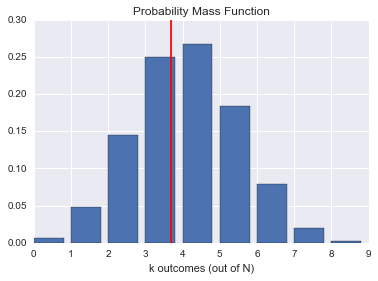

In [5]:
plt.bar(outcome_counts, dist_pmf)
plt.title('Probability Mass Function')
plt.xlabel('k outcomes (out of N)')
plt.axvline(mean_prob, c='r')
plt.show()

This shows the probability mass Function. The red line indicates the mean value of 3.6936 wins. This is the expected number of wins that we will get with our current distribution of wins, draws and losses.

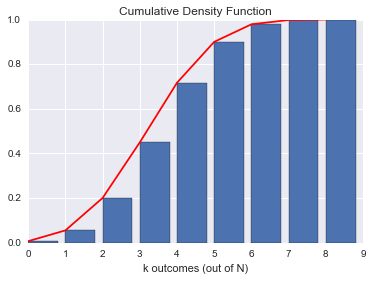

In [6]:
plt.bar(outcome_counts, dist_cdf)
plt.title('Cumulative Density Function')
plt.xlabel('k outcomes (out of N)')
plt.plot(dist_cdf, c='r')
plt.show()

This shows the cumaltive density function. The greatest increase is at the mean at 3 to 4. THis indicates that the majority of the variance occurs between 1 and 5.

## Probability Analysis (Points View)

In [7]:
win = 514
draw = 260
loss = 527
total = win+draw+loss

win_points = win*3
draw_points = draw*1
loss_points = 0
total_potential_points = total*3
points_needed = 15
points_available = 24
point_probability = (win_points + draw_points)/total_potential_points
print(point_probability)

0.4616961311811427


The probability of the team gaining a point is 46.17% which reflects our findings in the previews view of the analysis.

In [8]:
fifteen_points = combo(15,24)*prob(point_probability,15,24)
point_mean_prob = points_available*point_probability
point_outcome_counts = linspace(0,points_available,points_available+1)
point_dist_pmf = binom.pmf(point_outcome_counts,points_available,point_probability)
point_dist_cdf = binom.cdf(point_outcome_counts,points_available,point_probability)
point_cdf_p_fourteen = binom.cdf(14,24,point_probability)

print('{0:.4f} - is the probability of gaining a point\n'.format(point_probability))
print('{0:.4f} - chance we get 15 points only\n'.format(fifteen_points))
print('{0:.4f} - mean number of points likely to win\n'.format(point_mean_prob))
print('{0:.4f} - probability of winning 15 or more points\n'.format(1 - point_cdf_p_fourteen))

0.4617 - is the probability of gaining a point

0.0458 - chance we get 15 points only

11.0807 - mean number of points likely to win

0.0808 - probability of winning 15 or more points



### Graphs (Points)

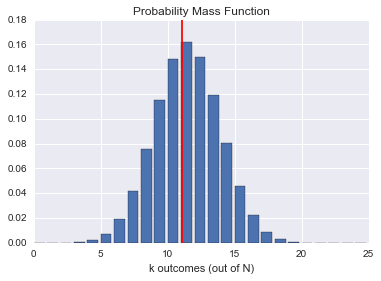

In [9]:
plt.bar(point_outcome_counts, point_dist_pmf)
plt.title('Probability Mass Function')
plt.xlabel('k outcomes (out of N)')
plt.axvline(point_mean_prob, c='r')
plt.show()

This shows probability mass function for the points. This shows that the mean number of points likely to be won is 11.08 which reflects the 3.6936 wins that we found in the previous analysis.

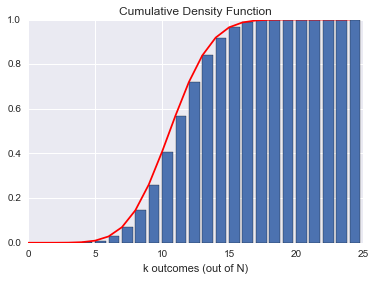

In [10]:
plt.bar(point_outcome_counts, point_dist_cdf)
plt.title('Cumulative Density Function')
plt.xlabel('k outcomes (out of N)')
plt.plot(point_dist_cdf, c='r')
plt.show()

This shows the cumulative density function. The majority of the variance is between 7 and 15, meaning that this region is where the majority of the probabilities lie as the curve plateaus around 15/16.

## Conclusion

To conclude, it doesn't look great! the odds are stacked against us, but not too drastically... we'll just have to wait and see! With the probability of us winning 5 or more games at 28.32%, that may not be a great motivator to the rest of the team but there is still a chance

Looking at the point cumulative density function, it's quite a steep slope to climb for promotion! With the mean points expected to earn in these remaining 24 games at 11.08. We will have to earn an additional 4 points, meaning we should be pushing for 2 wins when it looks like we're likely to draw twice to get the points required.

The points view is limited in that it assumes that each point is achieved as an individual event when we know that that isn't the case. Points are earned in 3's and 1's. The previous analysis takes this into account.

More insight into our games would be useful so that we are able to identify our weaknesses as to know where we can further develop and our strengths so we know what stratgeies to play when approaching games.